In [420]:
import pandas as pd
import seaborn as sns
import numpy as np
import numpy
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential

In [421]:
data=pd.read_csv("Covid19.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [422]:
data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3850,3851,07/07/20,8:00 AM,Tripura,-,-,1219,1,1680
3851,3852,07/07/20,8:00 AM,Uttarakhand,-,-,2586,42,3161
3852,3853,07/07/20,8:00 AM,Uttar Pradesh,-,-,19109,809,28636
3853,3854,07/07/20,8:00 AM,West Bengal,-,-,15235,779,22987
3854,3855,07/07/20,8:00 AM,Cases being reassigned to states,-,-,0,0,5034


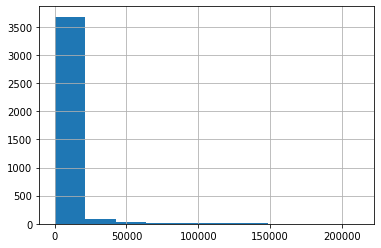

In [423]:
data.Confirmed.hist()

In [424]:
data=data.groupby("Date",sort=False,as_index=False)["Confirmed"].sum()

In [425]:
data.head()

,Date,Confirmed
0,30/01/20,1
1,31/01/20,1
2,01/02/20,2
3,02/02/20,3
4,03/02/20,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCF532CC48>]],
      dtype=object)

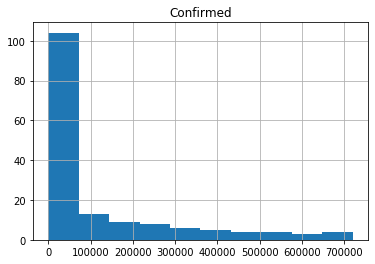

In [426]:
data.hist()

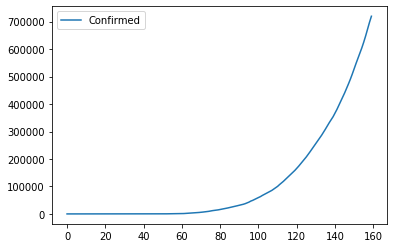

In [427]:
data.plot()

In [428]:
df=data["Confirmed"]+.0
df.shape

(160,)

In [429]:
df=np.log(df)
df

0       0.000000
1       0.000000
2       0.693147
3       1.098612
4       1.098612
         ...    
155    13.346377
156    13.382132
157    13.419746
158    13.455133
159    13.486541
Name: Confirmed, Length: 160, dtype: float64

In [430]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [431]:
df

array([[0.        ],
       [0.        ],
       [0.05139547],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.0814599 ],
       [0.1193366 ],
       [0.13285537],
       [0.24707629],
       [0.25219197],
       [0.25462327],
       [0.26147257],
       [0.27164576],
       [0.28388609],
       [0.30107371],
       [0.30358745],
       [0.3191378 ],
       [0.3258396 ],
       [0.32853619],
       [0.3485312 ],
       [0.35117963],
       [0.364

In [432]:
print(len(df)-len(df)*0.2)

128.0


In [433]:
train=df[:128]
test=df[128:]

In [434]:
print(train.shape)
print(test.shape)

(128, 1)
(32, 1)


In [435]:
def create_batch(data,batch_size):
    x_data=[]
    y_data=[]
    for i in range(1,len(data)-batch_size):
        x_data.append(data[i:i+batch_size])
        y_data.append(data[i+batch_size:i+batch_size+1])
    return numpy.array(x_data),numpy.array(y_data)

In [491]:
batch_size=20
x_train,y_train=create_batch(train,batch_size)
x_test,y_test=create_batch(test,batch_size)

In [437]:
print(x_train.shape)
print(y_train.shape)

(107, 20, 1)
(107, 1, 1)


In [438]:
print(x_test.shape)
print(y_test.shape)

(11, 20, 1)
(11, 1, 1)


In [439]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [440]:
print(x_train.shape)
print(y_train.shape)

(107, 20, 1)
(107, 1)


In [441]:
print(x_test.shape)
print(y_test.shape)

(11, 20, 1)
(11, 1)


In [323]:
model=Sequential()
model.add(LSTM(40,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(20))
model.add(Dense(1))


model.compile(optimizer="adam",loss="mean_squared_error")

In [324]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 20, 40)            6720      
_________________________________________________________________
lstm_20 (LSTM)               (None, 20, 40)            12960     
_________________________________________________________________
lstm_21 (LSTM)               (None, 20)                4880      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 24,581
Trainable params: 24,581
Non-trainable params: 0
_________________________________________________________________


In [406]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=10)

Train on 107 samples, validate on 11 samples
Epoch 1/10
107/107 [==============================] - 70s 650ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 2/10
107/107 [==============================] - 70s 656ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 3/10
107/107 [==============================] - 74s 695ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 4/10
107/107 [==============================] - 63s 586ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 5/10
107/107 [==============================] - 62s 580ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 6/10
107/107 [==============================] - 62s 576ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 7/10
107/107 [==============================] - 62s 579ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 8/10
107/107 [==============================] - 62s 575ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 9/10
107/107 [==============================] - 61s 572ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 10/10
107/107 [=======

In [442]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [444]:
test_predict

array([[0.933286  ],
       [0.93464935],
       [0.9360073 ],
       [0.9373619 ],
       [0.9387133 ],
       [0.9400601 ],
       [0.941399  ],
       [0.94272774],
       [0.9440461 ],
       [0.9453563 ],
       [0.94666094]], dtype=float32)

In [448]:
test_predict=scaler.inverse_transform(test_predict)
train_predict=scaler.inverse_transform(train_predict)

In [449]:
df=scaler.inverse_transform(df)
df

array([[ 0.        ],
       [ 0.        ],
       [ 0.69314718],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.09861229],
       [ 1.60943791],
       [ 1.79175947],
       [ 3.33220451],
       [ 3.40119738],
       [ 3.4339872 ],
       [ 3.52636052],
       [ 3.66356165],
       [ 3.8286414 ],
       [ 4.06044301],
       [ 4.09434456],
       [ 4.30406509],
       [ 4.39444915],
       [ 4.4308168 ],
       [ 4

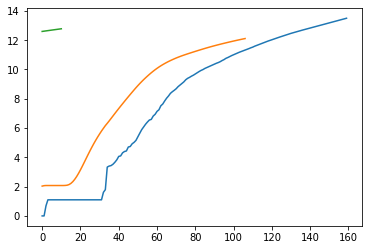

In [451]:
plt.plot(df)
plt.plot(train_predict)
plt.plot(test_predict)

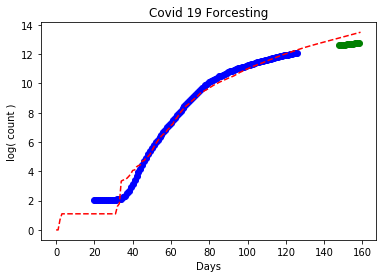

In [547]:
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict


testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(data)-1, :] = test_predict

plt.plot(trainPredictPlot,'bo')
plt.plot(testPredictPlot,'go')
plt.plot(df,'r--')
plt.title("Covid 19 Forcesting")
plt.xlabel("Days")
plt.ylabel("log( count )")
plt.show()